X: [[ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]]
Y: [0 0 0 0 0 1 1 1 1 1]
w: [-0.54633169 -0.01911635 -0.87442312]
xdotw: [-0.56544805 -0.56544805 -0.56544805 -0.56544805 -0.56544805 -1.42075481
 -1.42075481 -1.42075481 -1.42075481 -1.42075481]
delta shape: (10,)
ddd: 30.8989268331


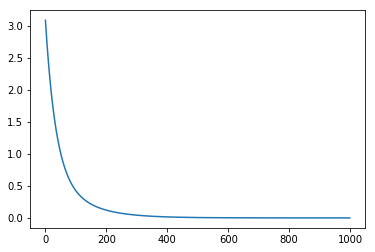

final w: [ 0.44906899 -0.44289682  0.54475803]


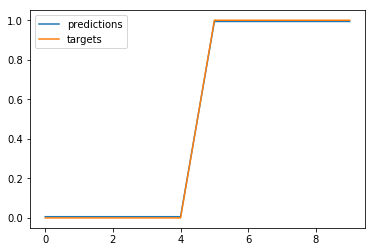

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10 
D = 3

X = np.zeros((N,D))
X[:,0] = 1
X[:5,1] = 1
X[5:,2] = 1
print('X:', X)
Y = np.array([0]*5 + [1]*5)
print('Y:',Y)

# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y)) ==> we can't use it since X.T.dot(X) a singular matrix
# sing = X.T.dot(X)
# np.linalg.det(sing) ==> the determinant is 0.0

# so we're going to use Gradient Descent

costs = [] # we're storing the costs so we can show how they drop as we use Gradient Descent
# set w ~ N(0,1/D)
# For deep learning it's useful to limit the variance of the output when there are multiple layers.
# One can show that by limiting the variance of the weights to 1/D, assuming that the inputs have variance 1, 
# will yield an output of variance 1 also.
# https://www.udemy.com/data-science-linear-regression-in-python/learn/v4/questions/2709664

w = np.random.randn(D)  / np.sqrt(D) # If X ~ N(0,1), then X*sqrt(var) ~ N(0, var); If X∼N(μ,σ^2), then aX∼N(aμ,a^2σ^2)
print('w:', w)
learning_rate = 0.001
print('xdotw:', X.dot(w))
delta = X.dot(w) - Y
print('delta shape:',delta.shape)
print('ddd:',delta.dot(delta))
for t in range(1000) : 
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate * X.T.dot(delta)
    mse = delta.dot(delta) / N # mean squre error
    costs.append(mse)
    
plt.plot(costs)
plt.show()
print('final w:',w)

plt.plot(Yhat, label='predictions')
plt.plot(Y, label = 'targets')
plt.legend()
plt.show()